Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 64s 26ms/step - accuracy: 0.8508 - loss: 0.4958 - val_accuracy: 0.9532 - val_loss: 0.1579
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.9635 - loss: 0.1205 - val_accuracy: 0.9668 - val_loss: 0.1138
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 43s 15ms/step - accuracy: 0.9747 - loss: 0.0807 - val_accuracy: 0.9699 - val_loss: 0.1050
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 8ms/step - accuracy: 0.9822 - loss: 0.0619 - val_accuracy: 0.9737 - val_loss: 0.0991
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 14ms/step - accuracy: 0.9828 - loss: 0.0558 - val_accuracy: 0.9732 - val_loss: 0.0920
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 41s 14ms/step - accuracy: 0.9869 - loss: 0.0425 - val_accuracy: 0.9753 - val_loss: 0.1053
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.9896 - loss: 0.0331 - val_accuracy: 0.9753 - val_loss: 0.0961
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 16s 11ms/step - accuracy: 0.9893 - 

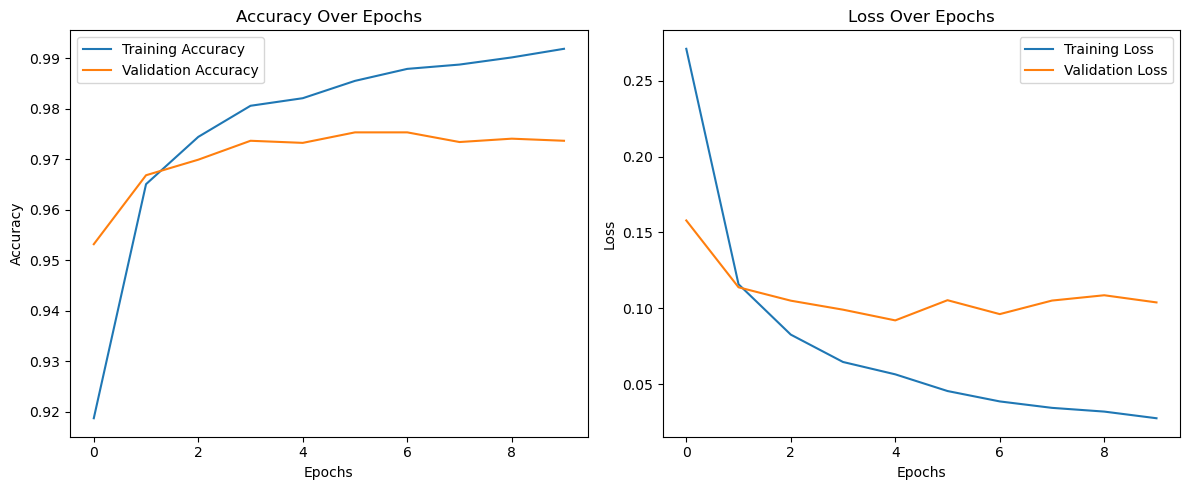

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


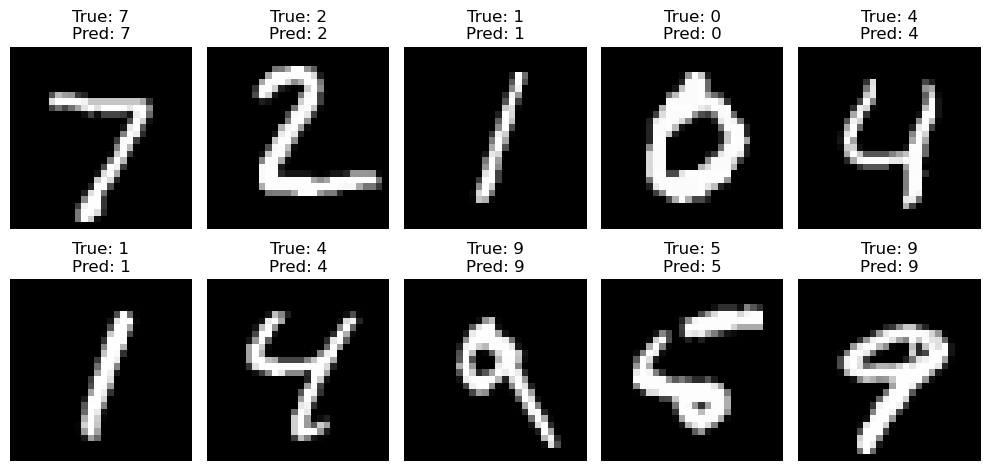

In [1]:
#3
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize inputs to [0, 1]

# Define the model
model = Sequential([
    Input(shape=(28, 28)),  # Define the input shape explicitly using Input layer
    Flatten(),  # Flatten 28x28 images into a vector
    Dense(128, activation='relu'),  # First hidden layer
    Dense(128, activation='relu'),  # Second hidden layer
    Dense(64, activation='relu'),   # Third hidden layer
    Dense(64, activation='relu'),   # Fourth hidden layer
    Dense(10, activation='softmax') # Output layer with 10 classes
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model and store training history
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
print("\nTraining complete!\n")

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Visualize some predictions
predictions = np.argmax(model.predict(x_test[:10]), axis=1)
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f"True: {y_test[i]}\nPred: {predictions[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
